### 분류 classification의 개요

1. 지도학습은 명시적인 정답(레이블)이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식


- 대표적인 유형인 '분류'는 학습데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 새로운 모델에 새로운 데이터값이 주어졌을 때 미지의 레이블 값을 예측하는 것


ex) 베이즈 통계와 생성 모델에 기반한 나이브 베이즈, 독립변수와 종속변수의 선형관계성에 기반한 로지스틱 회귀, 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신 등..

2. 앙상블은 분류에서 가장 각광받는 방법 중 하나임. 정형데이터의 예측 분석에서는 앙상블이 매우 높은 예측 성능을 보임


- 일반적으로 배깅(bagging)과 부스팅(boosting)으로 나뉨


- 전통적인 기법: 랜덤 포레스트, 그라디언트 부스팅 / 최신 기법: XGBoost, LightGBM, 앙상블의 앙상블이라 불리는 stacking


- 앙상블의 기본 알고리즘으로 사용하는 것은 '결정 트리'임, 매우 쉽고 유연하게 적용되기 때문, 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 매우 적음


- 예측 성능을 높이기 위해 복잡한 구조를 가져야 하는데, 앙상블에선 이게 오히려 장점임, 앙상블은 약한 학습기 여러개를 결합하여 오류가 발생한 부분에 가중치를 업뎃하면서 성능을 향상시키는데, 결정트리가 좋은 약한 학습기가 되어주기 때문

### 결정 트리 Decision Tree

- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘


- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

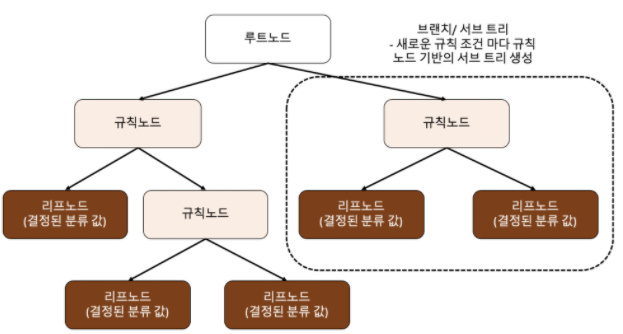

- 규칙노드: 규칙 조건


- 리프 노드(leaf node): 결정된 클래스값


- 서브 트리; 새로운 규칙 조건마다 생기는 노드

데이터셋의 피처가 결합해 규칙 조건을 만들 때마다 규칙조건이 만들어짐

그러나, 많은 규칙이 있다는 것은 분류를 결정하는 방식이 복잡해진다는 것 >> 과적합으로 이어지기 쉬움

즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높아짐

가능한 적은 결정 노드로 높은 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터셋이 해당 분류에 속할 수 있도록 결정노드의 규칙이 정해져야 함

이를 위해서 트리를 어떻게 분할(split)할 것인가가 중요

#### 균일한 데이터셋이란?

- 데이터셋의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침


- 상대적으로 혼잡도가 높고 균일도가 낮은 데이터셋은 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보 필요


- 결정 노드는 정보 균일도가 높은 데이터셋을 먼저 선택할 수 있도록 규칙 조건을 만듬


- 정보 균일도가 데이터셋으로 쪼개질 수 있도록 조건을 찾아 서브 데이터셋을 만들고, 다시 이 서브데이터셋에서 균일도가 높은 자식데이터셋을 쪼개는 방식을 반복함

ex) 박스 안에 30개의 레고가 있다. 각 레고 블록은 '모양'을 속성으로 동그라미, 세모, 네모, '색깔' 속성으로 노랑, 빨강, 파랑이 있다. 이 중 노랑색 블록은 모두 동그라미로 구성되고 빨강과 파랑의 경우 모양이 섞여있다면, 가장 첫 번째로 만들어야 하는 규칙 조건은 if 색깔 == '노랑색'이다.

- 정보의 균일도를 측정하는 대표적인 방식은 엔트로피 기반의 '정보 이득 지수'와 '지니 지수'가 있음

1. 정보 이득 지수: 엔트로피는 주어진 데이터 집합의 혼잡도를 의미. 서로 다른 값이 섞여있으면 엔트로피가 높고 같은 값이 섞여있으면 엔트로피가 낮음. 

> 정보 이득 지수 = 1 - 엔트로피 지수

- 즉, 정보 이득 지수가 높은 속성을 기준으로 분할



2. 지니 지수: 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 지수, 0이 가장 평등하고 1로 갈수록 불평등, 지니 지수가 낮을수록 데이터 균일도가 높으므로 지니 지수가 낮은 속성을 기준으로 분할

### 결정 트리 모델의 특징

- 장점: 정보의 '균일도'라는 룰을 기반으로 하여 알고리즘이 쉽고 직관적임, 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 데이터 전처리 작업이 필요 없음


- 단점: 과적합으로 정확도가 떨어짐, 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 만들다보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없음


- 즉, 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됌

### 결정 트리 파라미터

- 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반이다.


##### 파라미터

1. min_samples_split

- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어 

- 디폴트는 2, 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성↑

2. min_samples_leaf

- 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노트에서 가져야 할 최소한의 샘플 데이터 수

- 큰 값으로 설정할수록 왼, 오에서 각 가져야 할 최소 샘플데이터 수 조건을 만족시키기 어려워서 분할을 덜 수행함

- 과적합 제어 용도, 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이땐 작게 설정할 필요가 있음

3. max_features

- 최적의 분할을 위해 고려할 최대 피처 개수, 디폴트는 None으로 모든 피처 사용

- int로 지정하면 피처 개수, float로 지정하면 전체 중 대상 피처의 퍼센트

- sqrt는 루트 전체 피처 개수 만큼 선정

- auto로 지정하면 sqrt와 동일

- log는 전체 피처 중 log2(전체 피처 개수) 선정

4. max_depth

- 트리의 최대 깊이를 규정

- 디폴트는 None, 완벽하게 클래스 결정값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 증가시킴

- 깊이가 깊어지면 min_samples_split 설정대로 과적합될 수 있음

5. max_leaf_nodes

- 말단 노드의 최대 개수